<a href="https://colab.research.google.com/github/pmpatel-udallas/PChemLab/blob/main/Rotation_1_Treatment_of_Experimental_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rotation 1: Treatment of Experimental Data



## 0. Import Packages

In [ ]:
import numpy as np

# Import plotting functions and customizing the font for plots
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})
#matplotlib.rcParams.update({'font.family': 'Arial'})
#matplotlib.rcParams.update({'mathtext.fontset' : 'custom'})

# Import scipy packages for linear regression
# Using asterisks is a way to import everything
import scipy
from scipy import stats
from scipy.stats import *

# Import the pandas dataframe package for Excel-like analysis
import pandas as pd

# Insert a progress bar to show the progress of the script
# This is helpful for things that will take a while
!pip install tqdm
!jupyter nbextension enable --py widgetsnbextension
from tqdm.notebook import tqdm, tnrange, trange

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


## 1. Analysis using DataFrames

Dataframes work in 2 dimensions where you can do operations on each column and/or on each row.

This is denoted by using the dataframe name (e.g., data1) and then the operation (mean, std, sum, etc.). In the parentheses part of the operation, there are two options.

```
axis=0 # Operations along the column
axis=1 # Operations along the row
```

See the below sections for an example of calculating the mean.

In [ ]:
data1=pd.read_excel('PChem 1 Lab Data.xlsx',sheet_name='Pandas')
data1

,20,19,18,17,16,15,14,13,12,11,10
0,101.432,105.972,111.723,117.777,124.739,132.306,141.083,149.861,161.060,174.378,187.999
1,101.735,105.972,111.723,117.777,124.739,132.306,140.781,150.164,161.363,174.378,187.393
2,101.432,105.972,112.026,118.080,124.739,132.003,141.083,150.466,161.363,174.681,187.696
3,101.432,106.275,111.723,117.777,124.739,131.700,141.083,150.164,160.757,174.075,187.696
4,101.735,105.972,111.723,117.777,124.739,132.306,141.083,149.861,161.363,174.378,187.696
5,100.827,105.670,111.723,118.080,124.739,132.003,141.083,150.164,161.363,174.378,187.696
6,101.130,106.275,111.723,117.474,124.739,132.003,141.083,150.164,161.060,174.075,187.999
7,101.432,105.972,111.723,118.080,124.739,131.700,141.083,149.861,161.060,174.378,187.393
8,101.130,105.972,111.723,117.777,124.436,131.700,141.083,150.164,161.363,174.378,187.696
9,101.432,106.275,111.723,117.777,125.041,132.003,141.386,150.466,161.060,174.075,187.393


In [ ]:
data1.mean(axis=0)

,0
20,101.295804
19,105.984078
18,111.800314
17,117.771059
16,124.744784
15,131.997078
14,141.077255
13,150.051039
12,161.083765
11,174.318588


In [ ]:
data1.mean(axis=1)

,0
0,137.120909
1,137.121000
2,137.231000
3,137.038273
4,137.148455
5,137.066000
6,137.065909
7,137.038273
8,137.038364
9,137.148273


**Calculate the standard deviation of data1**

* Use the std function in the same way mean is used above
* Which axis (axis=0 or axis=1) will you calculate the standard deviation?


> Hint: You will need to include the ddof=1 option to have your standard deviation in Python match the numbers you get in Excel for the standard deviation of the sample. By default, the standard deviation calculated is that of the population.

### 1.1 t-test function

1.   List item
2.   List item



Define the two-tailed t-test function using the lambda function tool.

> Lambda functions define functions of multiple variables, but only output a single value



In [ ]:
# p = probability (5% or 0.05)
# df = degrees of freedom

tinv = lambda p, df: abs(t.ppf(p/2, df))

######
# Equivalent notation
#def tinv(p,df):
#    return abs(t.ppf(p/2,df))
######

ts2 = tinv(0.05, 50)
ts2

### 1.2 Mean and standard deviation

**Calculate the mean and standard deviation of all your data**

Use copy and paste to save time in replicating text.

#### Spreadsheet Option 1 (3 measurements)
If your Excel sheet names follow

20, 19, 18, 17, 16, 15, ...

Define a variable for each volume
```
vol20=pd.read_excel('file.xlsx',sheet_name='')
vol19=...
```

You can choose the name of the variables used to define each volume, but it has to start with a letter.

> Remember how to calculate the uncertainty of the reciprocal pressure when doing the standard deivation calculations

> Also remember we are calculating reciprocal pressure...

In [ ]:
# Import each volume measurement by using pd.read_excel('file.xlsx', sheet_name='20')
# You will need quotes for the text of the sheet name to match your sheet name









6

In [ ]:
# Calculate the mean for each volume along the appropriate axis

In [ ]:
# Calculate the standard deviation for each volume





In [ ]:
# Compute the 95% confidence interval by using the appropriate t value


In [ ]:
# To plot the values, you will need to create an array of the means and
# standard deviations. Use the np.array() function to do this.







In [ ]:
# You will also need an array of the measured volumes for linear fits.
# Do you need three separate arrays/lists for the volumes?

#### Spreadsheet Option 2 (3 trials)
If your Excel sheet names follow:

Trial 1, Trial 2, Trial 3

Define a variable for each trial
```
trial1= pd.read_excel(..., sheet_name='')
trial2= ...
trial3= ...
```

> Remember how to calculate the uncertainty of the reciprocal pressure when doing the standard deivation calculations.

> Also remember we are calculating reciprocal pressure...

In [ ]:
# Import each trial by using pd.read_excel('file.xlsx', sheet_name='Trial 1')
# You will need quotes for the text of the sheet name to match your sheet name








In [ ]:
# Calculate the mean for each trial along each appropriate axis


In [ ]:
# Calculate the standard deviation for each trial


In [ ]:
# Compute the 95% confidence interval by using the appropriate t value



In [ ]:
# To plot the values, you will need to create an array of the means and
# standard deviations. Use the np.array() function to do this.





In [ ]:
# You will also need an array of the measured volumes for linear fits.
# Do you need three separate arrays/lists for the volumes?




### 1.2 Linear Regression

Use the ``scipy.stats.linregress()`` function as we used before for linear regressions.

What are we trying to plot?


**What is the independent variable? What is the dependent variable?**

In [ ]:
# Save the scipy.stats.linregress() results to a new variable.
# We used a version of best_fit. Feel free to use whatever name you want.



In [ ]:
# Save the slope, intercept, slope error, intercept error, and r^2
# as separate variables from the best fit line






### 1.3 Errorbar plots

Use the ``plt.errorbar`` function to plot the best fit line with error bars. Find examples of how to use the syntax to help you create error bar plots.

In [ ]:
# Create a linear space for volume np.linspace(start, end, number of points)

# Use the slope and intercept to linearly transform x to y






# For axes labels, the $...$ notation helps with superscipt/subscript for axis labels
# $^$ is superscript while $_$ is subscript
# {} are needed if there is more than one character being superscript/subscript
# See the labels below for what you should be plotting
plt.xlabel('V (cm$^3$)')
plt.ylabel('1/P (kPa$^{-1}$)')


### 1.4 Graphical Error

If you want to create a plot that fills the space between two lines to visualize the graphical error of the best fits, use the ```plt.fill_between(x, y1, y2, color='grey', alpha=0.1)``` function. This will replicate the figures in the lab manual.

*Change the color and transparency (alpha value) as needed for aesthetics.*

In [ ]:
# Use the plt.fill_between() to represent the possible values that fit
# within the errors in volume and reciprocal pressure





### 1.5 Calculate V$_\text{fixed}$

In [ ]:
# Calculate V_fixed as done in the pre-lab using the results from 1.3 and 1.4




## 2. Monte Carlo Sampling

Monte Carlo simulations use random sampling to obtain numerical results.

In PChem research, Monte Carlo sampling is often used to sample various thermodynamic ensembles of molecules in a gas or solvated environment to predict thermodynamic and kinetic properties. For example, kinetic Monte Carlo (kMC) can be used to facilitate the thermodynamic understanding of a reaction profile to numerically calculate kinetic profiles. Grand canonical Monte Carlo (GCMC) is a statistical mechanical model in which a rigorous molecular-level model of adsorption is solved exactly. GCMC is usually used to computationally study adsorption of small molecules into the pores of metal organic frameworks.

In this lab, we are using Monte Carlo techniques to predict the best fit lines of data points that lie within the error bounds obtained through measurement. In other words,
**how does the error affect the best fit lines and can Monte Carlo approximate the graphical error obtained through the extremes of the slope and intercept?**

### 2.1 A quick example

Predict the area of a circle by using the ratio of points that lie within a circle that is enclosed in a square.
For a distance r, since
$$A_{circle}=\pi r^2$$
$$A_{square} = 4r^2$$

Then,

$$ 4 * \dfrac{A_{circle}}{A_{square}} = 4 * \dfrac{\pi r^2}{4r^2} = \pi $$

Therefore, we can estimate $\pi$ using a Monte Carlo sampling of the ratio between the number of points that lie within a circle and within a square (unit distance)

  0%|          | 0/7 [00:00<?, ?it/s]

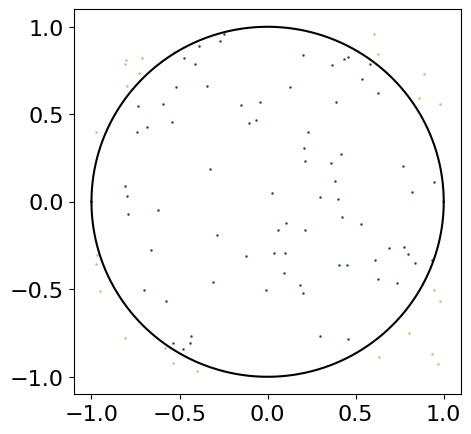

Estimate of pi using 101 points: 2.970297


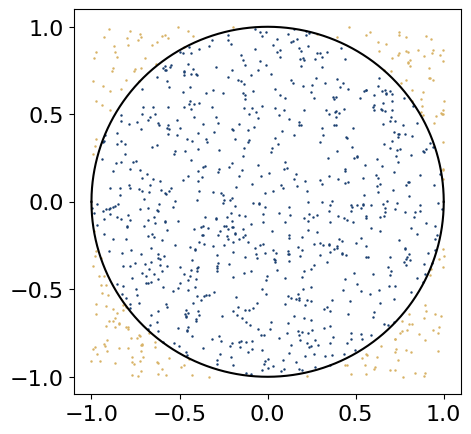

Estimate of pi using 1001 points: 3.128871


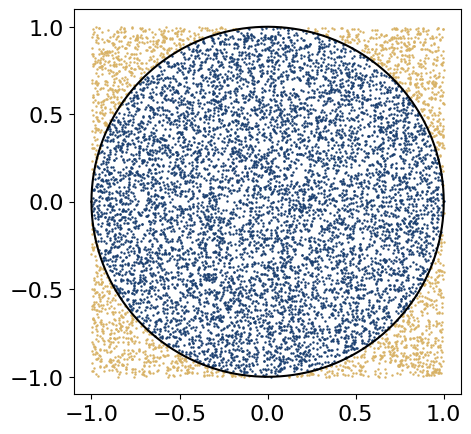

Estimate of pi using 10001 points: 3.171683


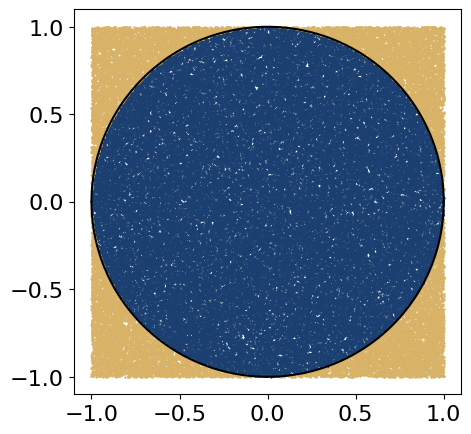

Estimate of pi using 100001 points: 3.133489


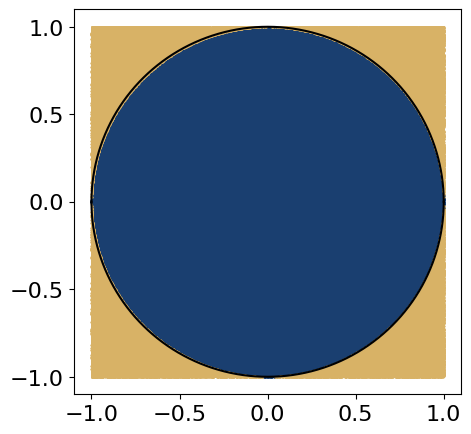

Estimate of pi using 1000001 points: 3.141341


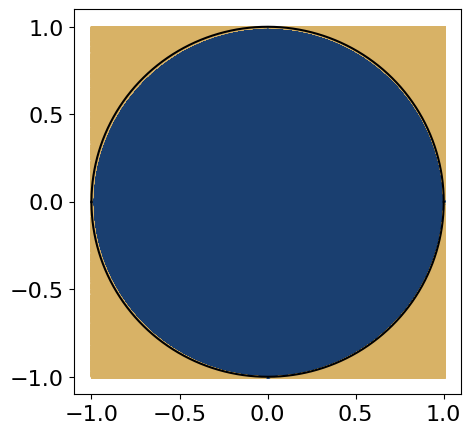

Estimate of pi using 10000001 points: 3.141844


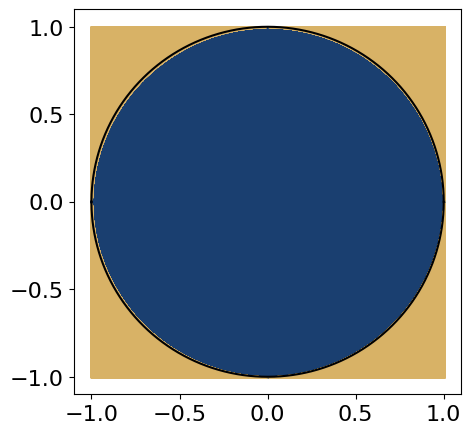

Estimate of pi using 20000001 points: 3.140946


In [ ]:
# Define the number of points in a circle and square
circle_points = 0
square_points = 0

# Define the intervals
INTERVAL=[1e2+1, 1e3+1, 1e4+1, 1e5+1, 1e6+1, 1e7+1, 2e7+1]

# Drawing the circle
Xspace = np.linspace(-1,1,20001)
Yspace = np.sqrt(1-Xspace**2)

# Run a loop over all possible values
for i in tnrange(len(INTERVAL)):
    #Generate the number of sampling points
    rand_x = np.random.uniform(-1,1,int(INTERVAL[i]))
    rand_y = np.random.uniform(-1,1,int(INTERVAL[i]))

    # Calculate the distance of (x,y) to origin
    origin_dist = rand_x**2 + rand_y**2

    # Checking if (x,y) lies within the circle using the np.where() function, which returns elements

    cond = np.where(origin_dist<=1)
    cond2= np.array(sorted(list(set(np.arange(INTERVAL[i],dtype=int))-set(cond[0]))))
    # Computing the number of points inside the circle
    circle_points = len(cond[0])

    #Computing the number of points inside the square (includes inside the circle) -- all the points
    square_points = INTERVAL[i]

    # Plot the circle points and square points
    fig = plt.figure(figsize=(5,5))
    plt.plot(rand_x[cond],rand_y[cond],'o',markersize=0.75,color='#1A3F70')
    plt.plot(rand_x[cond2],rand_y[cond2],'o',markersize=0.75,color='#D8B266')
    plt.plot(Xspace,Yspace,'k')
    plt.plot(Xspace,-Yspace,'k')
    plt.show()

    # Estimate pi from Monte Carlo simulations
    pi_est = 4 * circle_points/square_points
    print('Estimate of pi using '+str(int(INTERVAL[i]))+' points:','%0.6f'%pi_est)


**Discuss as a group what you think was happening in this demonstration?**

--Text annotation answer can go here--

### 2.2 Now you do it

Grab your data values and replace the green comments in the cell below with your values. Then run the cell below to run the Monte Carlo.

In [ ]:
DATAmean=#include the combined array for reciprocal pressure
DATAstd=#calculate the 95% CI (ts2*std)
ts2=#include the value of student t used
X1=#array of volumes

# Use the best fit parameters as the base line
best_fit=scipy.stats.linregress(X1,DATAmean)


**In your lab report, you will be responsible for interpreting the functionality of this Monte Carlo code**

In [ ]:
# Run 10K (or 100K) best fit line data points – Monte Carlo
points=10000
stats=[]
data_pts=[]

# Generates the same random numbers for reproducibility using a random seed (any integer).
np.random.seed(10)

# Uses a progress bar (tqdm) to show how calculation is proceeding
with tqdm(total= points, desc='Calculating Best Fit Lines') as pbar:
    for i in range(points):

        # What do you think this will do?
        X3=X1+np.random.normal(0,0.05,11)

        # Sets the randomly selected pressures from your data using a normal distribution
        Y3=np.array(DATAmean+np.random.normal(loc=0, scale=DATAstd/ts2, size=(11)))

        res1 = scipy.stats.linregress(X3, Y3) # Calculates the best fit line parameters
        ts1 = tinv(0.05, len(X3)-2) # Calculates the student-t value

        # Append all your data to a spreadsheet like document
        data_pts.append([X3,Y3])
        stats.append([res1.slope, ts1*res1.stderr, res1.intercept, ts1*res1.intercept_stderr])
        pbar.update(1) # Updates the progress bar

pd.DataFrame(stats).to_csv('MonteCarlo_v1.csv')

In [ ]:
stats=pd.read_csv('MonteCarlo_v1.csv',index_col=0)
MC_stats_df=pd.DataFrame(stats)
MC_stats_df.columns=['Slope','Slope Error','Intercept','Intercept Error']
MC_stats_df

In [ ]:
plt.plot(MC_stats_df['Slope'],MC_stats_df['Intercept'],'o',color='grey',alpha=0.1)
plt.plot(best_fit.slope, best_fit.intercept,'bo')
plt.ticklabel_format(axis='both', style='sci', scilimits=(-4,4))
plt.xlabel('Slopes (kPa$^{-1}$ cm$^{-3}$)')
plt.ylabel('Intercepts (kPa$^{-1}$)')
plt.show()

**What do you think the Monte Carlo data is showing in terms of modeling uncertanity?**

-- Put your notes here--